In [2]:
import math
import random
import pandas as pd
import numpy as np

data_path = "tahkeer_data.csv"
all_data = pd.read_csv(data_path)

# nicotine dependency, carbon monoxide levels, daily cigarette consumption, age of
# smoking initiation, previous quit attempts, emotional well-being, personality traits, and motivation to
# quit

all_data.dtypes

Unnamed: 0               int64
weight(kg)               int64
HDL                      int64
hearing(left)            int64
triglyceride             int64
fasting blood sugar      int64
Cholesterol              int64
LDL                      int64
AST                      int64
Gtp                      int64
eyesight(left)         float64
waist(cm)              float64
hearing(right)           int64
serum creatinine       float64
dental caries            int64
systolic                 int64
smoking                  int64
dtype: object

# Univariate Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = all_data.columns.tolist()[1:]
columns.remove("smoking")

columns

['weight(kg)',
 'HDL',
 'hearing(left)',
 'triglyceride',
 'fasting blood sugar',
 'Cholesterol',
 'LDL',
 'AST',
 'Gtp',
 'eyesight(left)',
 'waist(cm)',
 'hearing(right)',
 'serum creatinine',
 'dental caries',
 'systolic']

count    159256.000000
mean         67.143662
std          12.586198
min          30.000000
25%          60.000000
50%          65.000000
75%          75.000000
max         130.000000
Name: weight(kg), dtype: float64
count    159256.000000
mean         55.852684
std          13.964141
min           9.000000
25%          45.000000
50%          54.000000
75%          64.000000
max         136.000000
Name: HDL, dtype: float64
count    159256.000000
mean          1.023974
std           0.152969
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(left), dtype: float64
count    159256.000000
mean        127.616046
std          66.188989
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         766.000000
Name: triglyceride, dtype: float64
count    159256.000000
mean         98.352552
std          15.329740
min          46.000000
25%          90.000000
50%          96.000

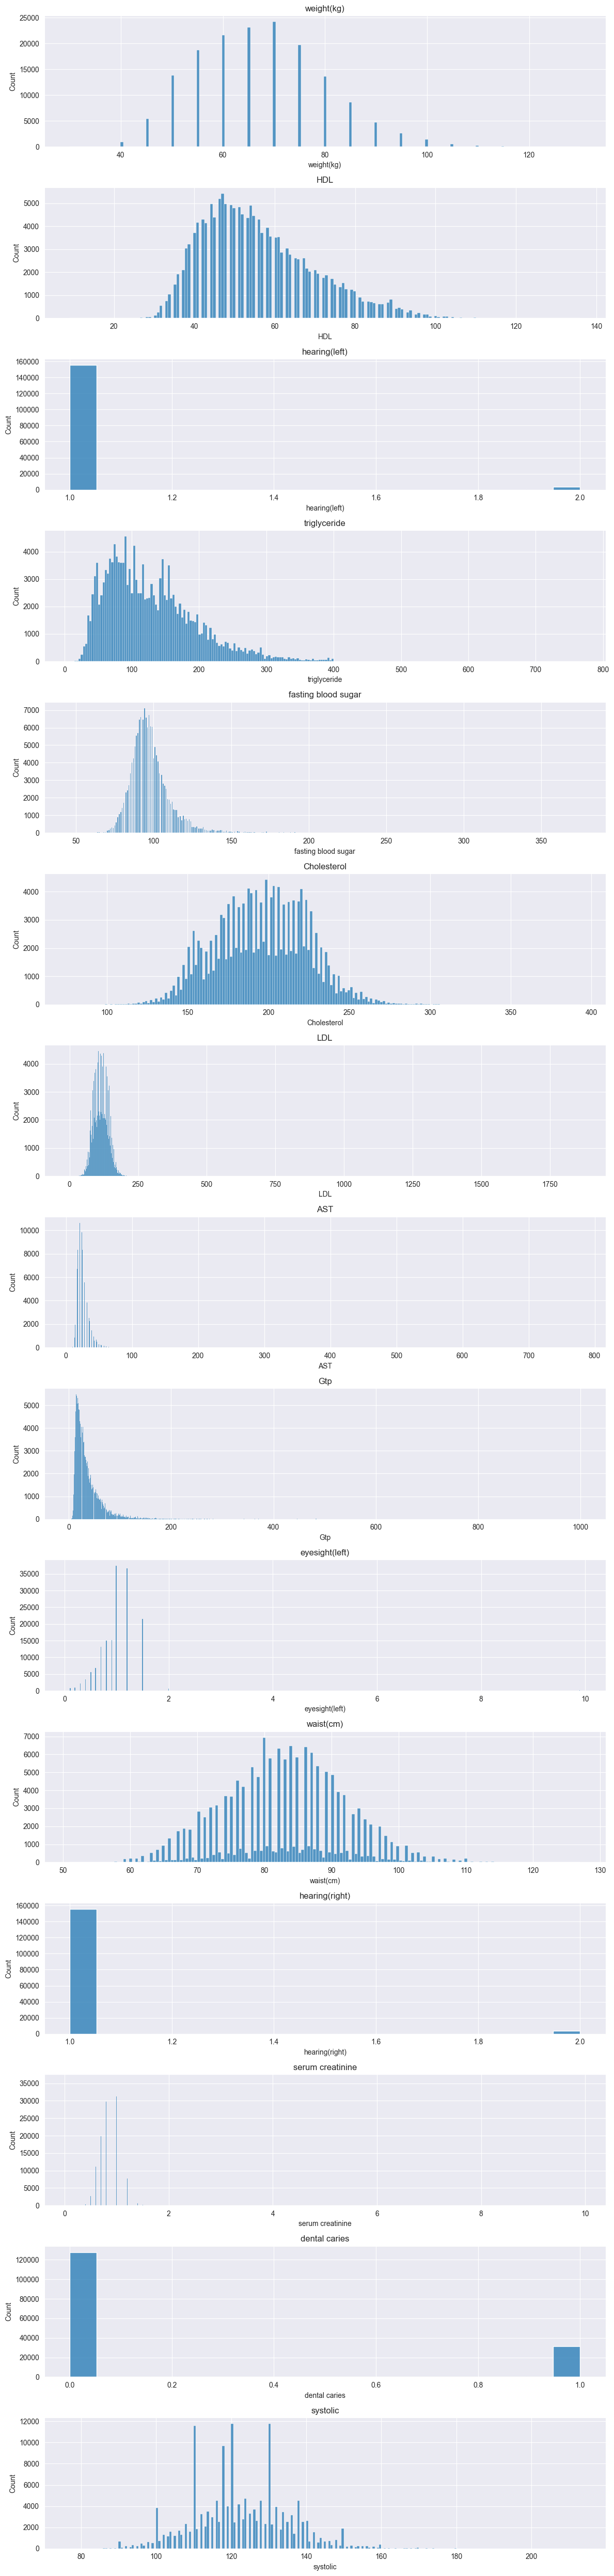

In [4]:
column_count = len(columns)
fig, axs = plt.subplots(column_count, 1, figsize=(12, 50))

for i in range(len(columns)):
    plt.subplot(column_count, 1, i+1)
    column = columns[i]
    sns.histplot(all_data, x=column, ax=axs[i])
    plt.title(column)
    print(all_data[column].describe())

plt.tight_layout()
plt.show()

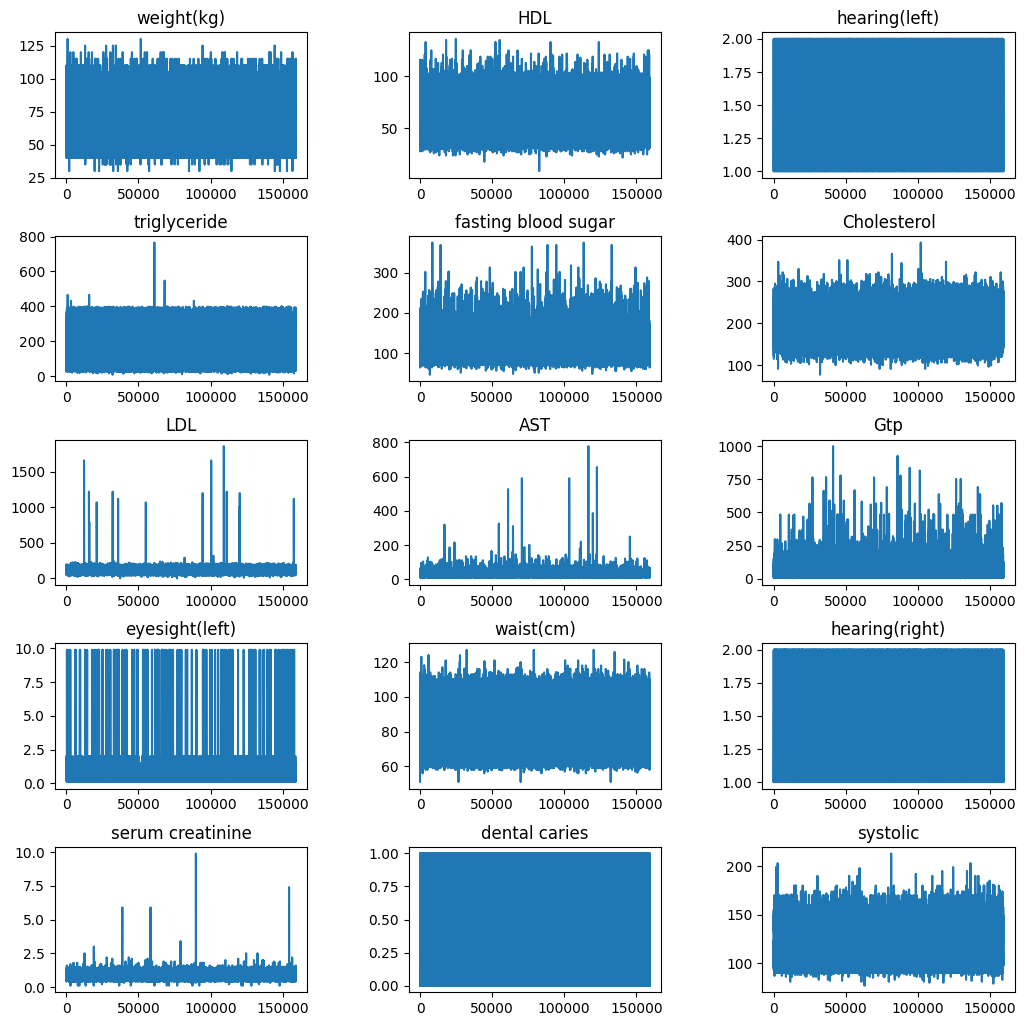

In [42]:
fig, axs = plt.subplots(column_count, 1, figsize=(12, 12))

for i in range(len(columns)):
    plt.subplot(column_count, 1, i+1)
    column = columns[i]
    plt.plot(all_data.index, all_data[column])
    plt.title(column)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Data analysis from normal distribution
We notice the following:
### Continuous variables
- Weight doesn't have a lot of outliers, but we can cut off from 40 to 100Kg
- HDL cholesterol has a lot of outliers, but we can cut off from 20 to 100
- Triglyceride has a lot of outliers, but we can cut off from 0 to 400
- Fasting blood sugar has a lot of outliers, but we can cut off from 60 to 150
- Cholesterol has a lot of outliers, but we can cut off from 100 to 300
- LDL cholesterol has a lot of outliers, but we can cut off from 20 to 250
- AST has a lot of outliers, but we can cut off from 0 to 90
- GTP has a lot of outliers, but we can cut off from 0 to 180
- Eyesight has a lot of outliers, but we can cut off from 0 to 2
- waist has a lot of outliers, but we can cut off from 55 to 110
- serum creatinine has a lot of outliers, but we can cut off from 0 to 2
- systolic has a lot of outliers, but we can cut off from 80 to 170

### Categorial variables
- hearing (left)
- hearing (right)
- dental caries


# Bivariate Analysis
## Exploring the correlation between the variables

/var/folders/z2/cjrd3zb541b3nd7crcfktv6w0000gn/T/ipykernel_4041/790762995.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


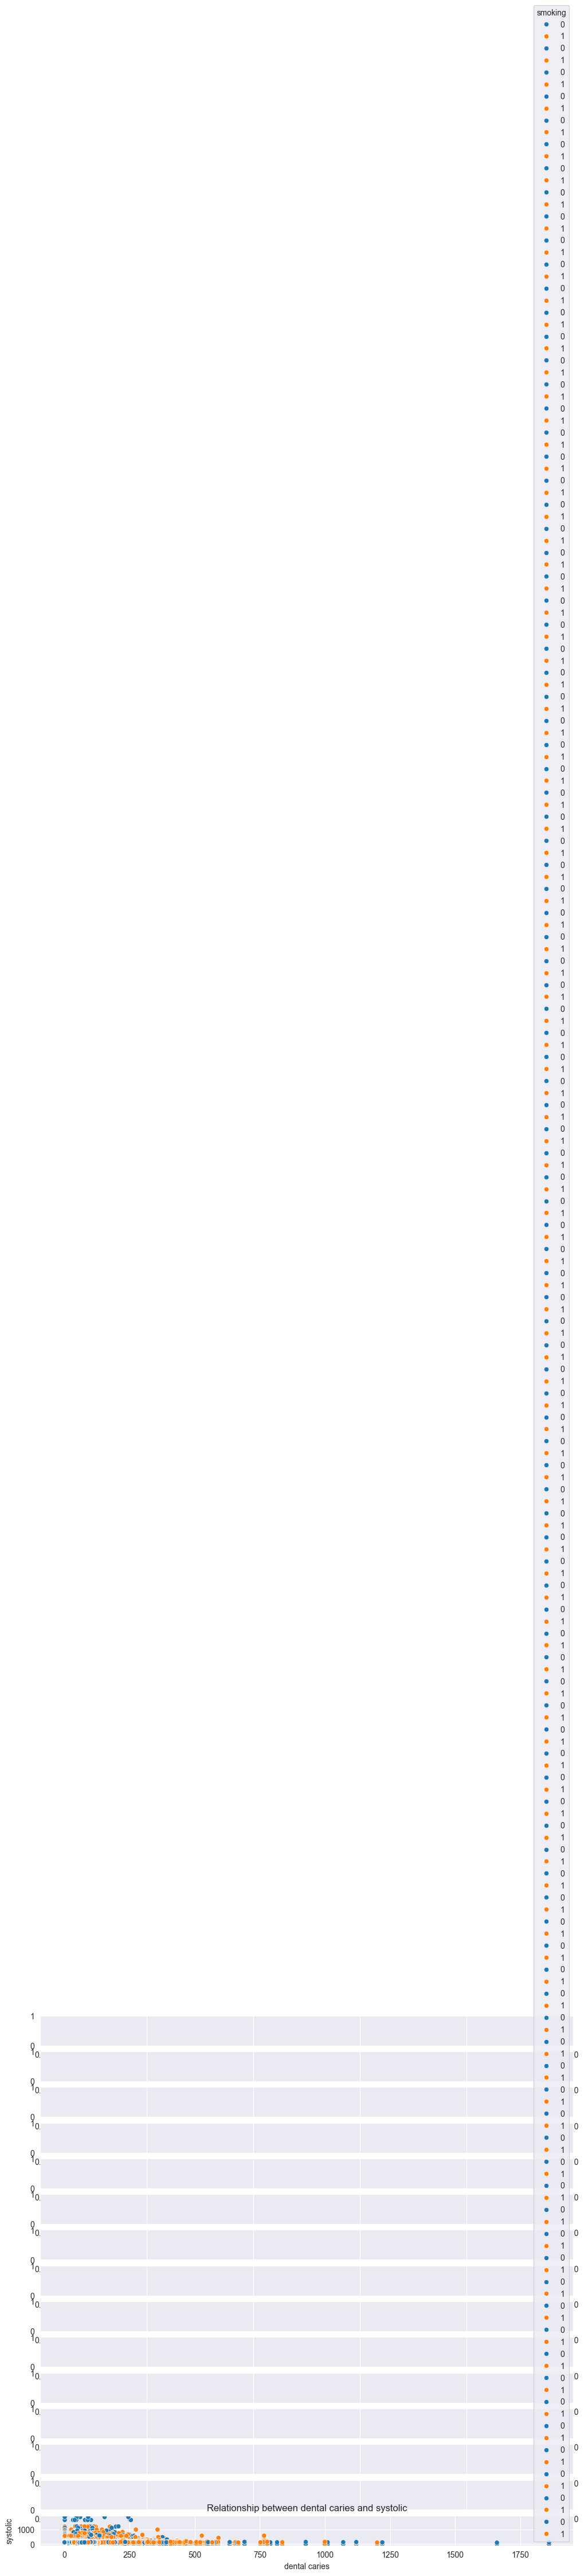

In [7]:
fig, axs = plt.subplots(column_count, 1, figsize=(12, 12))
for i in range(column_count - 1):
    for j in range(i + 1, column_count):
        feature_1 = columns[i]
        feature_2 = columns[j]

        sns.scatterplot(x=feature_1, y=feature_2, data=all_data, hue='smoking')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.title(f'Relationship between {feature_1} and {feature_2}')

plt.tight_layout()
plt.show()

## Correlation Matrix

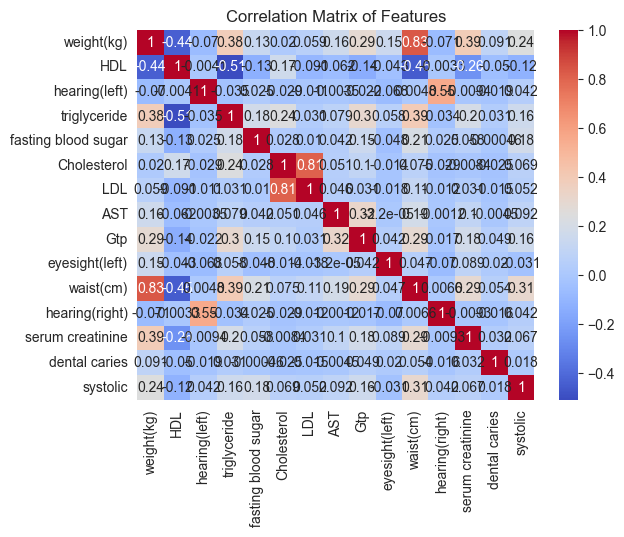

In [8]:
# Creating a correlation matrix for all features
correlation_matrix = all_data[columns].corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Multivariate Analysis

/Library/Python/3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


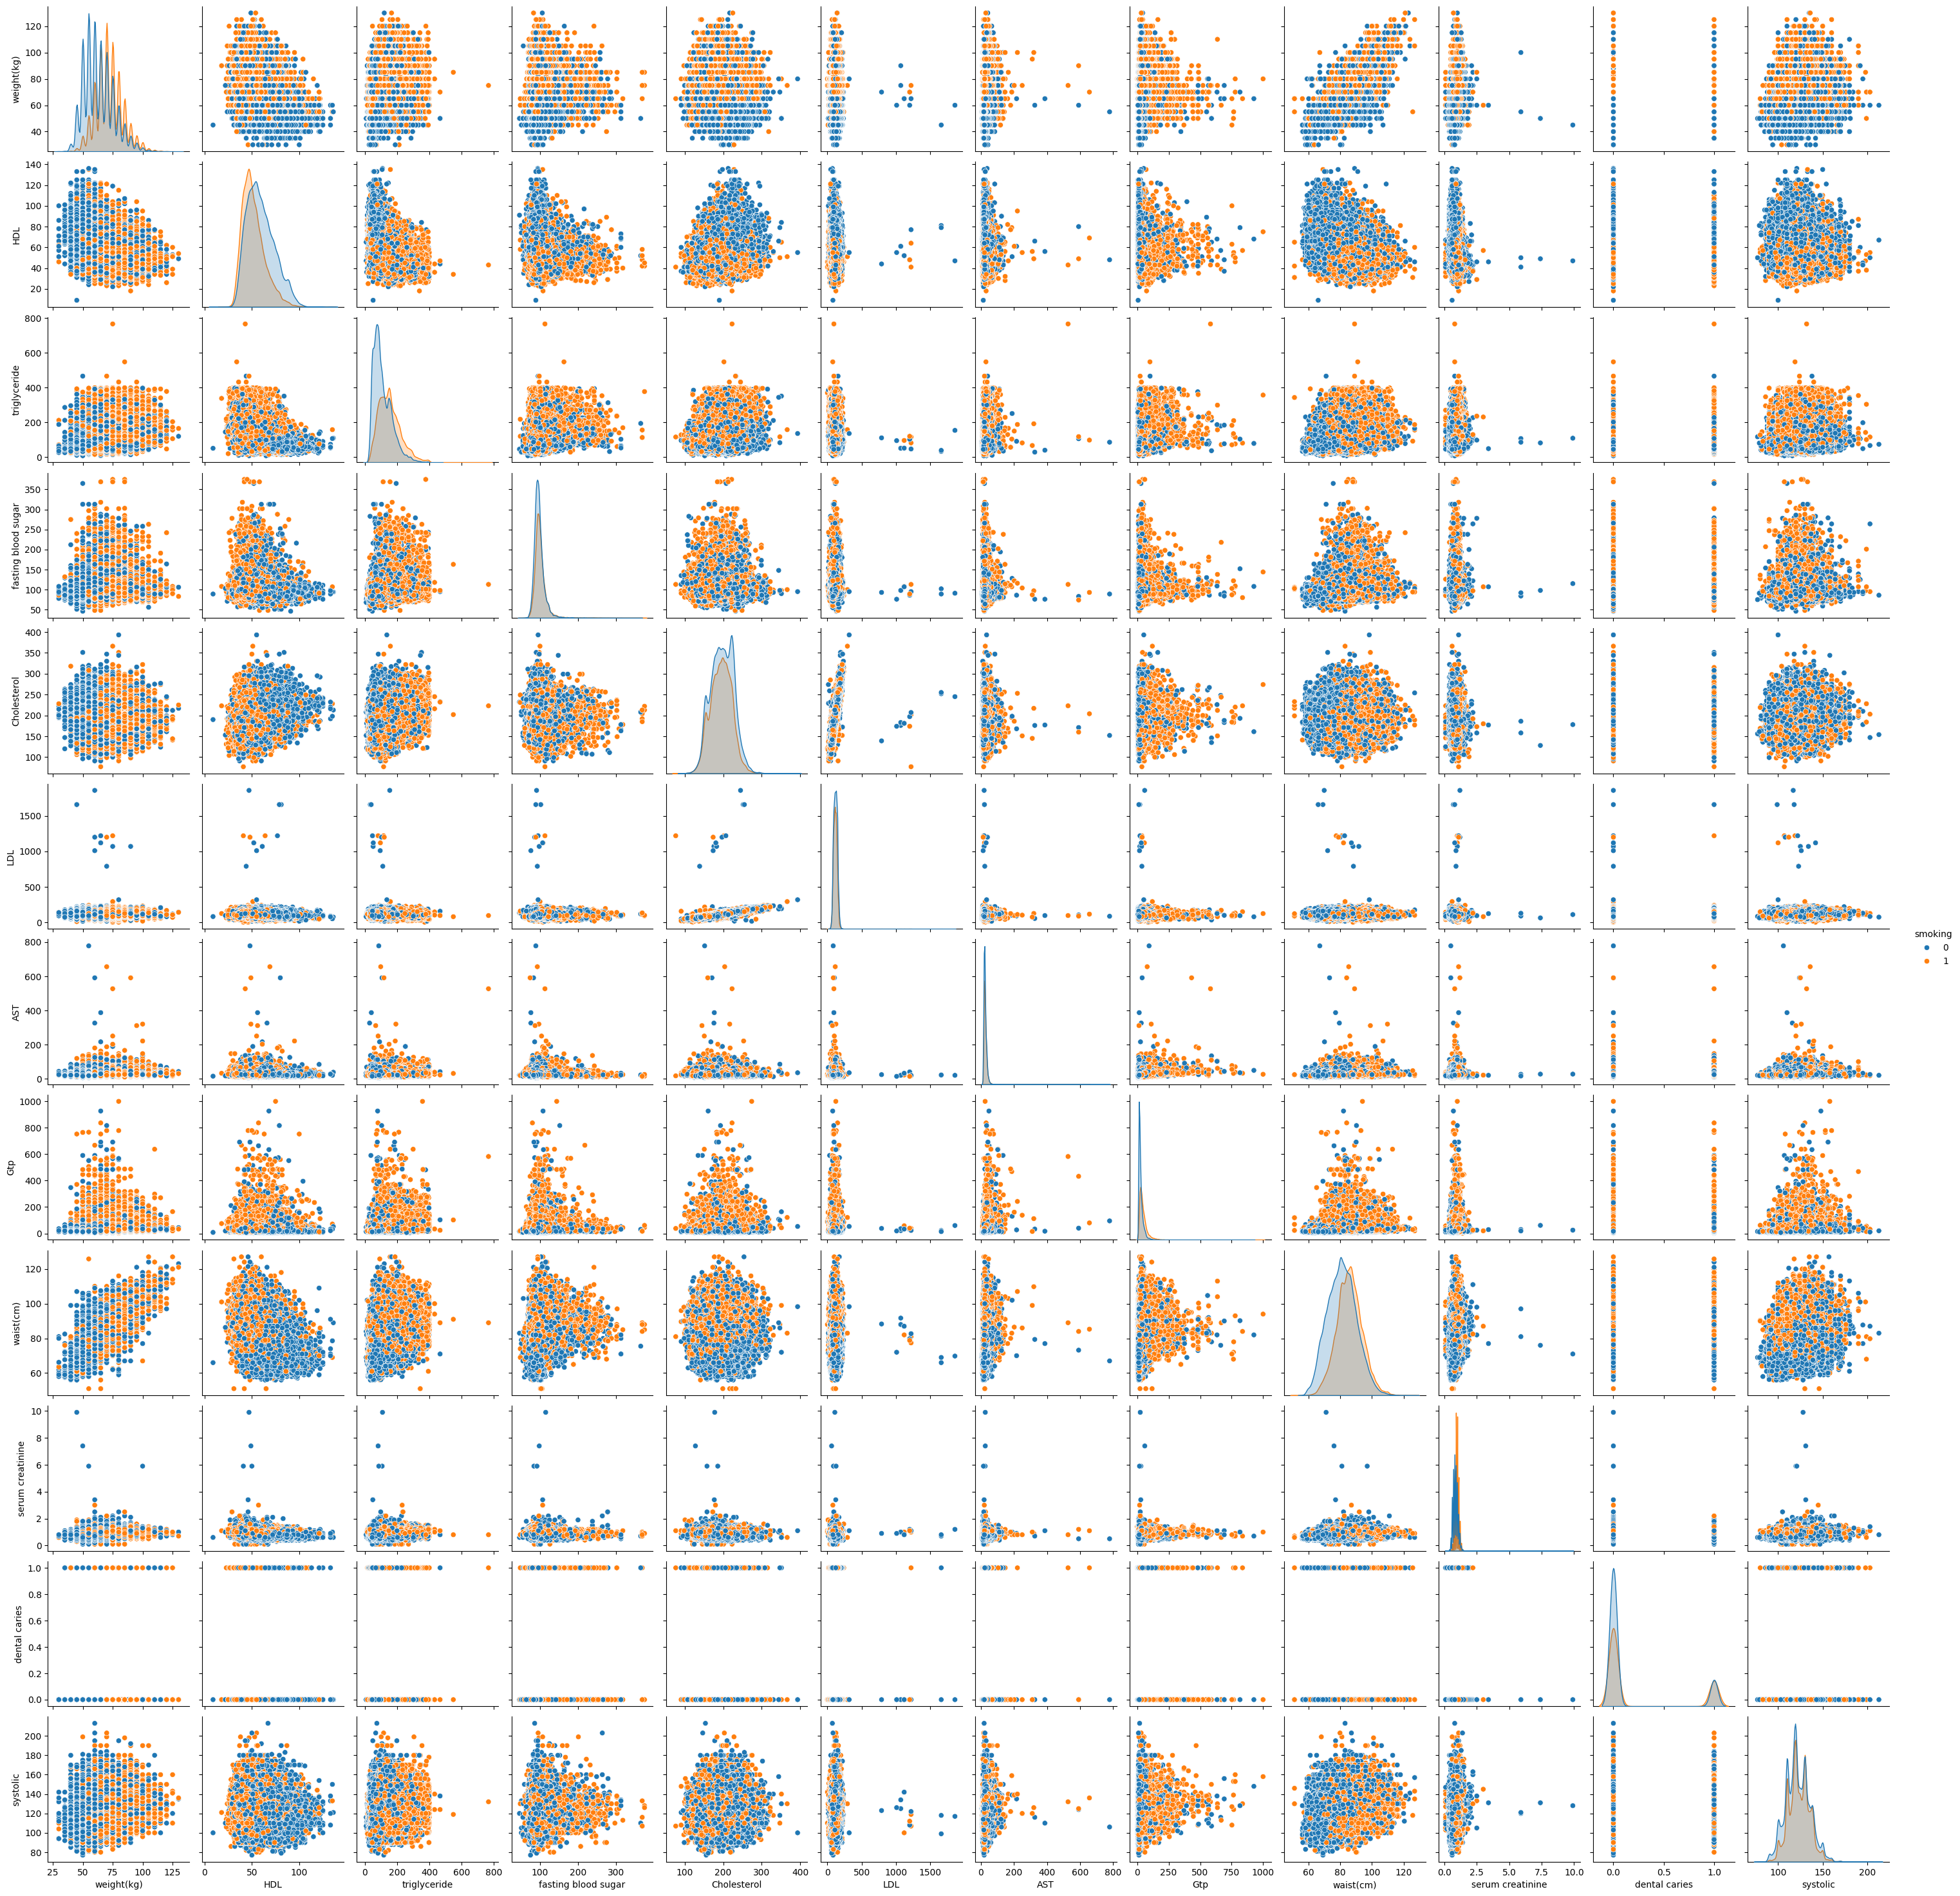

In [67]:
continuous_columns = columns.copy()
continuous_columns.remove("hearing(left)")
continuous_columns.remove("hearing(right)")
continuous_columns.remove("eyesight(left)")
continuous_columns.append("smoking")
sns.pairplot(all_data[continuous_columns], hue='smoking')